In [2]:
%matplotlib inline


#### Import most functions and modules used in all figures

In [3]:
from chip_seq import *



In [4]:
sns.set_context('paper',font_scale=2)
sns.axes_style('darkgrid');

#### Create a list of Gene class instance and filter the list with list of duplicate genes

In [6]:
#create a list of Gene class instances

gene_list=create_gene_list('BurakAnnotation_polIIgenes.gff')

#remove duplicate genes

dup_genes=open('duplicate_genes.txt').readlines()
dup_genes=[item[:-1] for item in dup_genes]

print ('Number of genes:{}'.format(len(gene_list)))

no_dup_gene_list=[]
for item in gene_list:
    if item.name in dup_genes:
        pass
    else:no_dup_gene_list.append(item)
gene_list=no_dup_gene_list

print ('Number of genes:{}'.format(len(gene_list)))

Number of genes:6758
Number of genes:6372


#### Create list of datasets names, file locations, file type and normalization value

In [7]:
#locations should be the directory where datasets are stored
locations="../../Chip5/"

In [8]:
datasets=[('wt_me3',locations+'wt_me3_treat_pileup.bdg','bed',1),
          ('wt_me2',locations+'wt_me2_treat_pileup.bdg','bed',1),
         ('wt_me1',locations+'wt_me1_treat_pileup.bdg','bed',1),
         ('wt_h3',locations+'wt_h3_treat_pileup.bdg','bed',1),
         ('wt_input',locations+'wt_input_treat_pileup.bdg','bed',1)]


#### Create a hdf5 file containing the datasets, this step only needs to be done once

In [11]:
hdf5_file=h5py.File("Figure1.hdf5","w")

for item in datasets:
    print(item)
    create_hdf5_track(item[0],hdf5_file)
    load_track_in_hdf5(item[1],item[0],hdf5_file,item[2],item[3])

hdf5_file.close()
hdf5_file=h5py.File("Figure1.hdf5","r")

('wt_me3', '../../Chip5/wt_me3_treat_pileup.bdg', 'bed', 1)
('wt_me2', '../../Chip5/wt_me2_treat_pileup.bdg', 'bed', 1)
('wt_me1', '../../Chip5/wt_me1_treat_pileup.bdg', 'bed', 1)
('wt_h3', '../../Chip5/wt_h3_treat_pileup.bdg', 'bed', 1)
('wt_input', '../../Chip5/wt_input_treat_pileup.bdg', 'bed', 1)


#### Create a dataframe with RNA levels/gene

In [13]:
ypd=pd.read_csv('YPD_median.txt',sep='\t',names=['name','RNA'])

#### Create heat map matrixes for H3K4me3, H3K4me2 and H3K4me1

In [14]:
# prints are names of genes for which tracks can't be retrieved
wt_me3_heat=create_anchor_plot(hdf5_file,'wt_me3',-1500,1500,gene_list)
wt_me2_heat=create_anchor_plot(hdf5_file,'wt_me2',-1500,1500,gene_list)
wt_me1_heat=create_anchor_plot(hdf5_file,'wt_me1',-1500,1500,gene_list)

YAR075W
YCL076W
YFR057W
YAR075W
YCL076W
YFR057W
YAR075W
YCL076W
YFR057W


## Figure 1A

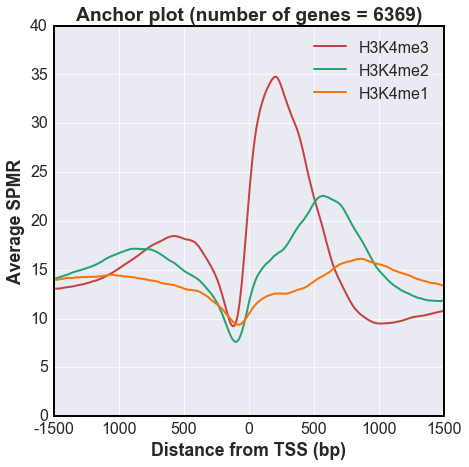

In [15]:
#Figure 1A creation, uncomment last line to create pdf file


mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
plt.figure(figsize=(7,7))

#the plot is done by averaging the value of each heat map matrix over the 0 axis

plt.plot(np.mean(wt_me3_heat[0],axis=0),label='H3K4me3',color=sns.xkcd_rgb['reddish'],lw=2)
plt.plot(np.mean(wt_me2_heat[0],axis=0),label='H3K4me2',color=sns.xkcd_rgb['teal green'],lw=2)
plt.plot(np.mean(wt_me1_heat[0],axis=0),label='H3K4me1',color=sns.xkcd_rgb['orange'],lw=2)
plt.legend(loc='best')
ax=plt.gca()
ax.set_ylim(0,40)
ax.set_title('Anchor plot (number of genes = 6369)',weight='bold')
ax.set_ylabel("Average SPMR",weight='bold')
ax.set_xticklabels([-1500,1000,500,0,500,1000,1500])

ax.set_xlabel('Distance from TSS (bp)',weight='bold');
#plt.savefig('Fig1A.pdf',type='pdf')

In [16]:
#In here we create arrays of maximum SPMR position and value and plot some statistics of each array

a=create_array(hdf5_file,'wt_me3',np.argmax,gene_list)
b=create_array(hdf5_file,'wt_me2',np.argmax,gene_list)
c=create_array(hdf5_file,'wt_me1',np.argmax,gene_list)

A=create_array(hdf5_file,'wt_me3',np.max,gene_list)
B=create_array(hdf5_file,'wt_me2',np.max,gene_list)
C=create_array(hdf5_file,'wt_me1',np.max,gene_list)

print('*'*20)
print('Position')
print('H3K4me3')
print("mean:{}; median:{}; 90 percentil:{}; stddev:{}".format(np.mean(a),
                                        np.median(a),np.percentile(a,90),np.std(a)))
print('H3K4me2')
print("mean:{}; median:{}; 90 percentil:{}; stddev:{}".format(np.mean(b),
                                        np.median(b),np.percentile(b,90),np.std(b)))

print('H3K4me1')
print("mean:{}; median:{}; 90 percentil:{}".format(np.mean(c),
                                        np.median(c),np.percentile(c,90)))

print('*'*20)
print('Max')
print('H3K4me3')
print("mean:{}; median:{}; 95 percentil:{}".format(np.mean(A),
                                        np.median(A),np.percentile(A,95)))
print('H3K4me2')
print("mean:{}; median:{}; 95 percentil:{}".format(np.mean(B),
                                        np.median(B),np.percentile(B,95)))

print('H3K4me1')
print("mean:{}; median:{}; 95 percentil:{}".format(np.mean(C),
                                        np.median(C),np.percentile(C,95)))

********************
Position
H3K4me3
mean:268.21374764595106; median:203.0; 90 percentil:439.0; stddev:330.6461831664099
H3K4me2
mean:526.6580351537979; median:528.0; 90 percentil:856.0; stddev:366.98795670568256
H3K4me1
mean:672.2496861268048; median:669.5; 90 percentil:1169.0
********************
Max
H3K4me3
mean:41.54499053955078; median:45.955360412597656; 95 percentil:63.406761169433594
H3K4me2
mean:32.758460998535156; median:33.5283088684082; 95 percentil:51.85710906982422
H3K4me1
mean:23.71076011657715; median:23.216590881347656; 95 percentil:34.82487106323242


In [17]:
#Here we create one dataframe for each modification, one row per gene, 
#with 3 collumns (name, maximum value and maximum value within the 90 percentile of positions*)
#*see manuscript text for explanation

df_wt_me3=pd.DataFrame({"name":[item.name for item in wt_me3_heat[-1]],
                       'max':create_array(hdf5_file,'wt_me3',np.max,wt_me3_heat[-1]),
                       'max_90_percentile':create_max_array(hdf5_file,'wt_me3',wt_me3_heat[-1],439)})

df_wt_me2=pd.DataFrame({"name":[item.name for item in wt_me3_heat[-1]],
                       'max':create_array(hdf5_file,'wt_me2',np.max,wt_me3_heat[-1]),
                       'max_90_percentile':create_max_array(hdf5_file,'wt_me2',wt_me3_heat[-1],856)})
df_wt_me1=pd.DataFrame({"name":[item.name for item in wt_me3_heat[-1]],
                       'max':create_array(hdf5_file,'wt_me1',np.max,wt_me3_heat[-1]),
                       'max_90_percentile':create_max_array(hdf5_file,'wt_me1',wt_me3_heat[-1],1169)})

In [18]:
#Here we create a sorting order for the heat maps using the H3K4me3 values

order=np.argsort(df_wt_me3['max_90_percentile'].tolist())

## Figure 1B

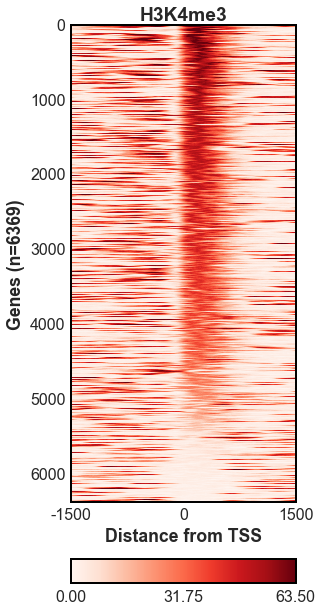

In [19]:
#Figure 1B 1 creation
#Vmax used correspond to the 95 percentile of maximum values, this exclude extreme outliers

with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(wt_me3_heat[0][order[::-1]],interpolation='none'
                    ,cmap='Reds',vmin=0,vmax=63.5)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('H3K4me3',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[0,63.5/2,63.5])
    #plt.savefig('Fig1B_1.pdf',type='pdf')

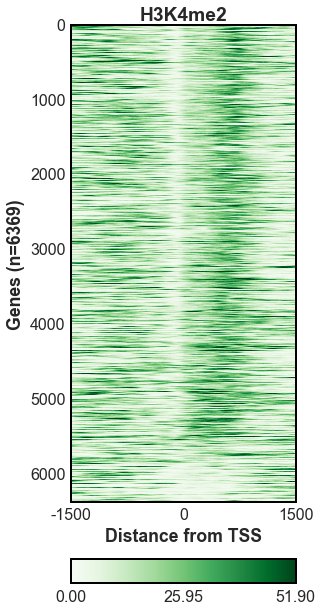

In [20]:
#Figure 1B 2 creation
#Vmax used correspond to the 95 percentile of maximum values, this exclude extreme outliers


with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(wt_me2_heat[0][order[::-1]],interpolation='none',
                    cmap='Greens',vmin=0,vmax=51.9)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('H3K4me2',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[0,51.9/2,51.9])
    #plt.savefig('Fig1B_2.pdf',type='pdf')

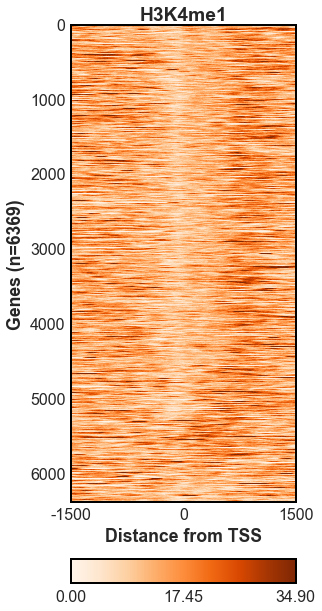

In [21]:
#Figure 1B 2 creation
#Vmax used correspond to the 95 percentile of maximum values, this exclude extreme outliers


with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(wt_me1_heat[0][order[::-1]],interpolation='none',
                    cmap='Oranges',vmin=0,vmax=34.9)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('H3K4me1',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[0,34.9/2,34.9])
    #plt.savefig('Fig1B_3_version3.pdf',type='pdf')

In [22]:
#Here we create dataframes similar to the previous ones, except that all genes (not only the ones in the heat map)
#are considered and we calculate both the value and position of 90 percentile

df_wt_me3_all=pd.DataFrame({"name":[item.name for item in gene_list],
                       'max':create_array(hdf5_file,'wt_me3',np.max,gene_list),
                       'max_90_percentile':create_max_array(hdf5_file,'wt_me3',gene_list,439),
                       'argmax_90_percentile':create_argmax_array(hdf5_file,'wt_me3',gene_list,439)})

df_wt_me2_all=pd.DataFrame({"name":[item.name for item in gene_list],
                       'max':create_array(hdf5_file,'wt_me2',np.max,gene_list),
                       'max_90_percentile':create_max_array(hdf5_file,'wt_me2',gene_list,856),
                        'argmax_90_percentile':create_argmax_array(hdf5_file,'wt_me2',gene_list,856)})

df_wt_me1_all=pd.DataFrame({"name":[item.name for item in gene_list],
                       'max':create_array(hdf5_file,'wt_me1',np.max,gene_list),
                       'max_90_percentile':create_max_array(hdf5_file,'wt_me1',gene_list,1169),
                       'argmax_90_percentile':create_argmax_array(hdf5_file,'wt_me1',gene_list,1169)    })

In [23]:
#Calculation of some statistics regarding the spread of positions of maximum value

from scipy.stats import levene as levene
from scipy.stats import bartlett as bartlett
lev=levene(df_wt_me3_all.argmax_90_percentile,df_wt_me2_all.argmax_90_percentile)
bar=bartlett(df_wt_me3_all.argmax_90_percentile,df_wt_me2_all.argmax_90_percentile)
print('Levene Test:statist: {},pvalue: {}'.format(lev.statistic,lev.pvalue))
print('Bartlett Test:statist: {},pvalue: {}'.format(bar.statistic,bar.pvalue))


Levene Test:statist: 3451.810417687851,pvalue: 0.0
Bartlett Test:statist: 3434.5896087253304,pvalue: 0.0


## Figure 1C

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


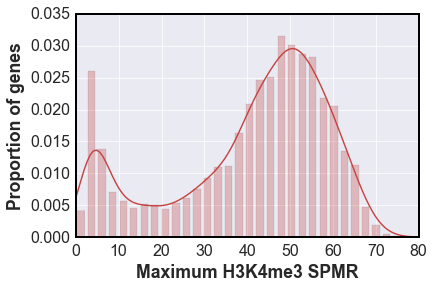

In [24]:
#Figure 1C 1 creation

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
sns.distplot(df_wt_me3_all['max_90_percentile'],color=sns.xkcd_rgb['reddish'],hist_kws={'alpha':0.3,'rwidth':0.7})
ax=plt.gca()
ax.set_xlim(0,80)
ax.set_xlabel('Maximum H3K4me3 SPMR',weight='bold')
ax.set_ylabel("Proportion of genes",weight='bold')
plt.tight_layout()
#plt.savefig('Fig1C_1.pdf',type='pdf')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


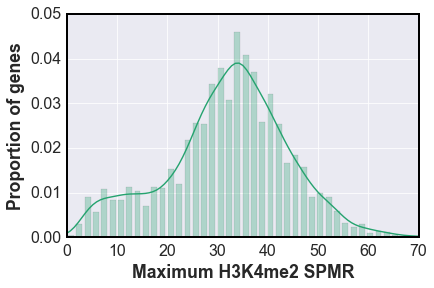

In [25]:
#Figure 1C 2 creation

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
sns.distplot(df_wt_me2_all['max_90_percentile'],color=sns.xkcd_rgb['teal green'],hist_kws={'alpha':0.3,'rwidth':0.7})
ax=plt.gca()
ax.set_xlim(0,70)
ax.set_xlabel('Maximum H3K4me2 SPMR',weight='bold')
ax.set_ylabel("Proportion of genes",weight='bold')
plt.tight_layout()

#plt.savefig('Fig1C_2.pdf',type='pdf')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


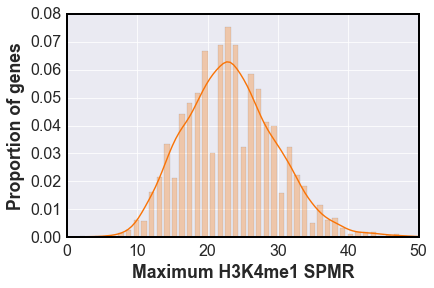

In [26]:
#Figure 1C 3 creation

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
sns.distplot(df_wt_me1_all['max_90_percentile'],color=sns.xkcd_rgb['orange'],hist_kws={'alpha':0.3,'rwidth':0.7})
ax=plt.gca()
ax.set_xlim(0,50)
ax.set_xlabel('Maximum H3K4me1 SPMR',weight='bold')
ax.set_ylabel("Proportion of genes",weight='bold')
plt.tight_layout()

#plt.savefig('Fig1C_3_v3.pdf',type='pdf')

## Figure1 D

In [239]:
df_wt_me3_all_ypd=pd.merge(left=df_wt_me3_all,right=ypd,on='name',how='inner')
df_wt_me2_all_ypd=pd.merge(left=df_wt_me2_all,right=ypd,on='name',how='inner')
df_wt_me1_all_ypd=pd.merge(left=df_wt_me1_all,right=ypd,on='name',how='inner')

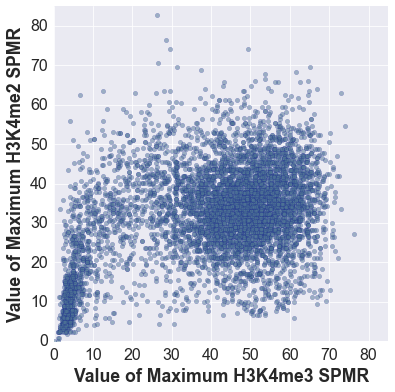

In [111]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me3_all['max_90_percentile'],df_wt_me2_all['max_90_percentile'],color=sns.xkcd_rgb['cadet blue'],alpha=0.5,edgecolor='darkblue')
plt.xlim(0,85)
plt.ylim(0,85)
plt.xlabel('Value of Maximum H3K4me3 SPMR',weight='bold')
plt.ylabel('Value of Maximum H3K4me2 SPMR',weight='bold')
#plt.savefig('Fig1D.pdf',type='pdf')

## Figure1 E

In [240]:
print('RNA vs me3 value:{}'.format(spearman(df_wt_me3_all_ypd['RNA'],df_wt_me3_all_ypd['max_90_percentile'])))
print('RNA vs me2 value:{}'.format(spearman(df_wt_me2_all_ypd['RNA'],df_wt_me2_all_ypd['max_90_percentile'])))
print('RNA vs me3 pos:{}'.format(spearman(df_wt_me3_all_ypd['RNA'],df_wt_me3_all_ypd['argmax_90_percentile'])))
print('RNA vs me2 pos:{}'.format(spearman(df_wt_me2_all_ypd['RNA'],df_wt_me2_all_ypd['argmax_90_percentile'])))
#print(spearman(df_wt_me1_all_ypd['RNA'],df_wt_me1_all_ypd['max_90_percentile']))
#print(spearman(df_wt_me1_all_ypd['RNA'],df_wt_me1_all_ypd['argmax_90_percentile']))

RNA vs me3 value:SpearmanrResult(correlation=0.53169175343289043, pvalue=0.0)
RNA vs me2 value:SpearmanrResult(correlation=0.34388804332707684, pvalue=3.2431457141755073e-176)
RNA vs me3 pos:SpearmanrResult(correlation=0.10256320317048065, pvalue=2.3269247157911207e-16)
RNA vs me2 pos:SpearmanrResult(correlation=0.38879626443065374, pvalue=7.8345984712391968e-229)


In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me3_all_ypd['RNA'],df_wt_me3_all_ypd['max_90_percentile'],alpha=0.4,color=sns.xkcd_rgb['reddish'],edgecolor='darkred')
plt.xlim(0,5)
plt.ylim(0,80)
plt.xlabel('RNA levels',weight='bold',size=24)
plt.ylabel('Max H3K4me3 SPMR',weight='bold',size=24)
plt.title('Spearman corr = 0.532',size=20)
plt.tight_layout()
plt.savefig('Fig1E_11.pdf',type='pdf')

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me2_all_ypd['RNA'],df_wt_me2_all_ypd['max_90_percentile'],alpha=0.4,color=sns.xkcd_rgb['teal green'],edgecolor='darkgreen')
plt.xlim(0,5)
plt.ylim(0,80)
plt.xlabel('RNA levels',weight='bold',size=24)
plt.ylabel('Max H3K4me2 SPMR',weight='bold',size=24)
plt.title('Spearman corr = 0.344',size=20)
plt.tight_layout()
plt.savefig('Fig1E_12.pdf',type='pdf')

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me1_all_ypd['RNA'],df_wt_me1_all_ypd['max_90_percentile'],alpha=0.4,color=sns.xkcd_rgb['cerulean'],edgecolor='darkblue')
plt.xlim(0,5)
plt.ylim(0,55)
plt.xlabel('RNA levels',weight='bold',size=24)
plt.ylabel('Maximum value of H3K4me1 SPMR',weight='bold',size=24)
plt.tight_layout()
plt.savefig('Fig1E_13.pdf',type='pdf')

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me3_all_ypd['RNA'],df_wt_me3_all_ypd['argmax_90_percentile'],alpha=0.4,color=sns.xkcd_rgb['reddish'])
plt.xlim(0,5)
plt.ylim(0,439)
plt.xlabel('RNA levels',weight='bold',size=24)
plt.ylabel('Pos Max H3K4me3 SPMR',weight='bold',size=24)
plt.title('Spearman corr = 0.103',size=20)
plt.tight_layout()
plt.savefig('Fig1E_21.pdf',type='pdf')

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me2_all_ypd['RNA'],df_wt_me2_all_ypd['argmax_90_percentile'],alpha=0.4,color=sns.xkcd_rgb['teal green'],edgecolor='darkgreen')
plt.xlim(0,5)
plt.ylim(0,859)
plt.xlabel('RNA levels',weight='bold',size=24)
plt.ylabel('Pos Max H3K4me2 SPMR',weight='bold',size=24)
plt.title('Spearman corr = 0.389',size=20)
plt.tight_layout()
plt.savefig('Fig1E_22.pdf',type='pdf')

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me1_all_ypd['RNA'],df_wt_me1_all_ypd['argmax_90_percentile'],alpha=0.4,color=sns.xkcd_rgb['cadet blue'])
plt.xlim(0,5)
plt.ylim(0,1139)
plt.xlabel('RNA levels',weight='bold')
plt.ylabel('Position of Max value of H3K4me1 SPMR',weight='bold')
plt.tight_layout()
plt.savefig('Fig1E_23.pdf',type='pdf')

## Figure1 F

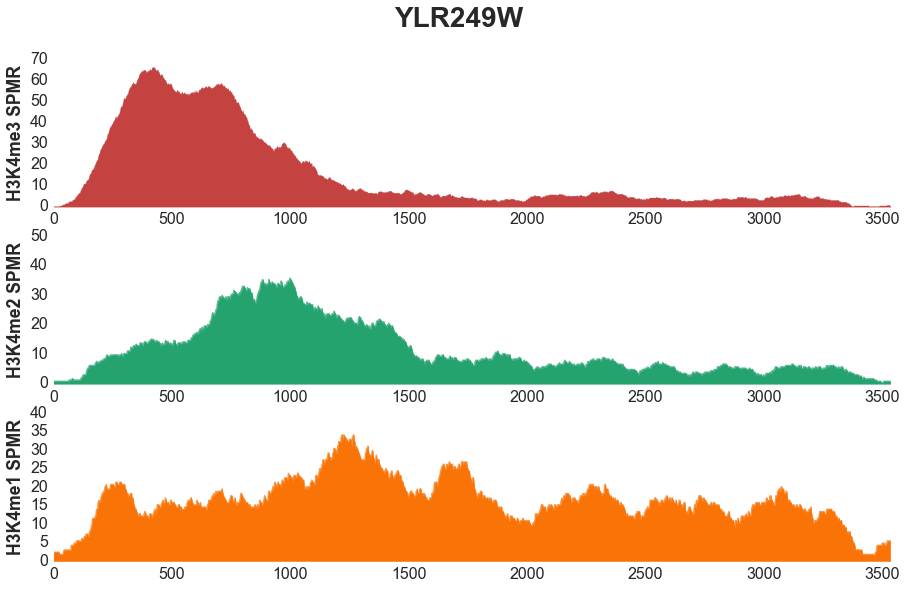

In [21]:
mpl.rcParams['axes.linewidth'] = 0
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,9))
ax1.plot(y=hdf5_file['wt_me3']['XII'][636780-200:639914+200],
         color=sns.xkcd_rgb['reddish'],alpha=0.7)
ax1.set_xlim(0,len(hdf5_file['wt_me3']['XII'][636780-200:639914+200]))
ax1.fill_between(y1=hdf5_file['wt_me3']['XII'][636780-200:639914+200],
                                 x=np.arange(0,len(hdf5_file['wt_me3']['XII'][636780-200:639914+200])),color=sns.xkcd_rgb['reddish'],alpha=1)
ax1.set_axis_bgcolor('white')

ax2.plot(hdf5_file['wt_me2']['XII'][636780-200:639914+200],color=sns.xkcd_rgb['teal green'],alpha=0.7)
ax2.set_xlim(0,len(hdf5_file['wt_me2']['XII'][636780-200:639914+200]))
ax2.fill_between(y1=hdf5_file['wt_me2']['XII'][636780-200:639914+200],
                                 x=np.arange(0,len(hdf5_file['wt_me2']['XII'][636780-200:639914+200])),
                 color=sns.xkcd_rgb['teal green'],alpha=1)
ax2.set_axis_bgcolor('white')

ax3.plot(hdf5_file['wt_me1']['XII'][636780-200:639914+200],color=sns.xkcd_rgb['orange'],alpha=0.7)
ax3.set_xlim(0,len(hdf5_file['wt_me1']['XII'][636780-200:639914+200]))
ax3.fill_between(y1=hdf5_file['wt_me1']['XII'][636780-200:639914+200],
                                 x=np.arange(0,len(hdf5_file['wt_me1']['XII'][636780-200:639914+200]))
                 ,color=sns.xkcd_rgb['orange'],alpha=1)
ax3.set_axis_bgcolor('white')

ax1.set_ylim(0,70)
ax2.set_ylim(0,50)
ax3.set_ylim(0,40)
fig.suptitle('YLR249W',weight='bold',size=28)
ax1.set_ylabel('H3K4me3 SPMR',weight='bold')
ax2.set_ylabel('H3K4me2 SPMR',weight='bold')
ax3.set_ylabel('H3K4me1 SPMR',weight='bold')
plt.savefig('Fig1F_1.pdf',type='pdf')

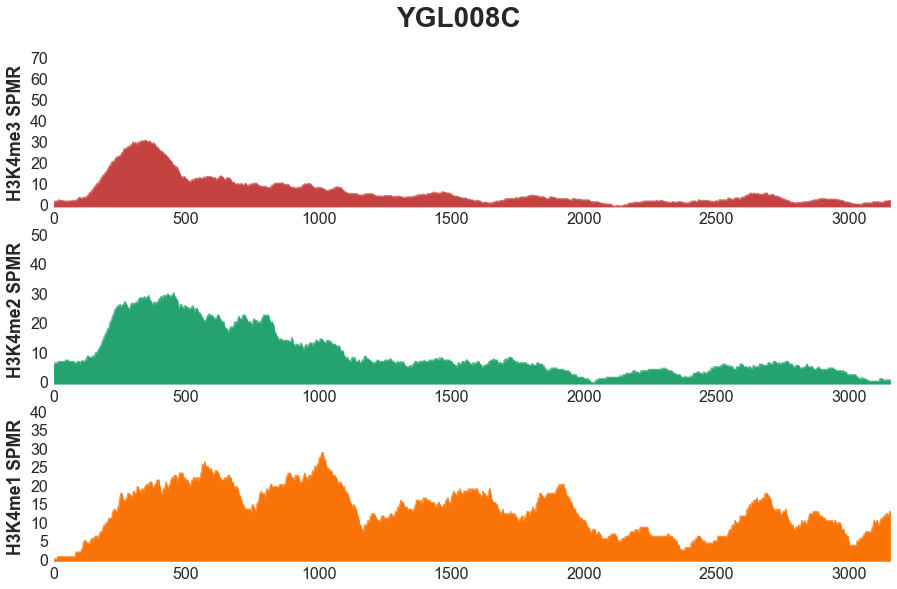

In [22]:

mpl.rcParams['axes.linewidth'] = 0
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,9))
ax1.plot(hdf5_file['wt_me3']['VII'][479910-200:482666+200][::-1],color=sns.xkcd_rgb['reddish'],alpha=0.7)
ax1.set_xlim(0,len(hdf5_file['wt_me3']['VII'][479910-200:482666+200][::-1]))
ax1.fill_between(y1=hdf5_file['wt_me3']['VII'][479910-200:482666+200][::-1],
                                 x=np.arange(0,len(hdf5_file['wt_me3']['VII'][479910-200:482666+200][::-1])),color=sns.xkcd_rgb['reddish'],
                 alpha=1)
ax1.set_axis_bgcolor('white')

ax2.plot(hdf5_file['wt_me2']['VII'][479910-200:482666+200][::-1],color=sns.xkcd_rgb['teal green'],alpha=0.7)
ax2.set_xlim(0,len(hdf5_file['wt_me2']['VII'][479910-200:482666+200][::-1]))
ax2.fill_between(y1=hdf5_file['wt_me2']['VII'][479910-200:482666+200][::-1],
                                 x=np.arange(0,len(hdf5_file['wt_me2']['VII'][479910-200:482666+200][::-1])),color=sns.xkcd_rgb['teal green'],
                 alpha=1)
ax2.set_axis_bgcolor('white')

ax3.plot(hdf5_file['wt_me1']['VII'][479910-200:482666+200][::-1],color=sns.xkcd_rgb['orange'],alpha=0.7)
ax3.set_xlim(0,len(hdf5_file['wt_me1']['VII'][479910-200:482666+200][::-1]))
ax3.fill_between(y1=hdf5_file['wt_me1']['VII'][479910-200:482666+200][::-1],
                                 x=np.arange(0,len(hdf5_file['wt_me1']['VII'][479910-200:482666+200][::-1])),
                 color=sns.xkcd_rgb['orange'],alpha=1)
ax3.set_axis_bgcolor('white')
ax1.set_ylim(0,70)
ax2.set_ylim(0,50)
ax3.set_ylim(0,40)
fig.suptitle('YGL008C',weight='bold',size=28)
ax1.set_ylabel('H3K4me3 SPMR',weight='bold')
ax2.set_ylabel('H3K4me2 SPMR',weight='bold')
ax3.set_ylabel('H3K4me1 SPMR',weight='bold')
plt.savefig('Fig1F_2.pdf',type='pdf')

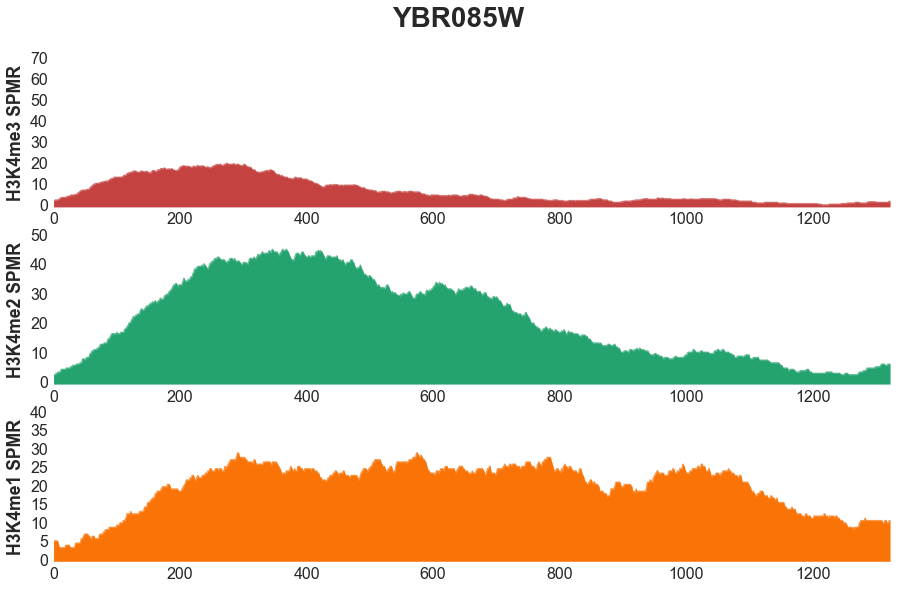

In [23]:
    
mpl.rcParams['axes.linewidth'] = 0
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,9))
ax1.plot(hdf5_file['wt_me3']['II'][415983-200:416906+200],color=sns.xkcd_rgb['reddish'],alpha=0.7)
ax1.set_xlim(0,len(hdf5_file['wt_me3']['II'][415983-200:416906+200]))
ax1.fill_between(y1=hdf5_file['wt_me3']['II'][415983-200:416906+200],
                                 x=np.arange(0,len(hdf5_file['wt_me3']['II'][415983-200:416906+200])),color=sns.xkcd_rgb['reddish'],alpha=1)
ax1.set_axis_bgcolor('white')

ax2.plot(hdf5_file['wt_me2']['II'][415983-200:416906+200],color=sns.xkcd_rgb['teal green'],alpha=0.7)
ax2.set_xlim(0,len(hdf5_file['wt_me2']['II'][415983-200:416906+200]))
ax2.fill_between(y1=hdf5_file['wt_me2']['II'][415983-200:416906+200],
                                 x=np.arange(0,len(hdf5_file['wt_me2']['II'][415983-200:416906+200]))
                 ,color=sns.xkcd_rgb['teal green'],alpha=1)
ax2.set_axis_bgcolor('white')

ax3.plot(hdf5_file['wt_me1']['II'][415983-200:416906+200],color=sns.xkcd_rgb['orange'],alpha=0.7)
ax3.set_xlim(0,len(hdf5_file['wt_me1']['II'][415983-200:416906+200]))
ax3.fill_between(y1=hdf5_file['wt_me1']['II'][415983-200:416906+200],
                                 x=np.arange(0,len(hdf5_file['wt_me1']['II'][415983-200:416906+200])),color=sns.xkcd_rgb['orange'],alpha=1)
ax3.set_axis_bgcolor('white')

ax1.set_ylim(0,70)
ax2.set_ylim(0,50)
ax3.set_ylim(0,40)
fig.suptitle('YBR085W',weight='bold',size=28)
ax1.set_ylabel('H3K4me3 SPMR',weight='bold')
ax2.set_ylabel('H3K4me2 SPMR',weight='bold')
ax3.set_ylabel('H3K4me1 SPMR',weight='bold')
plt.savefig('Fig1F_3.pdf',type='pdf')

## Supplementary Figure

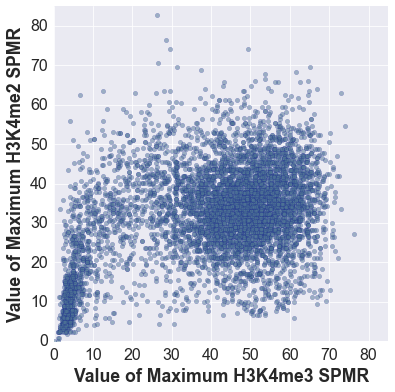

In [112]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_me3_all['max_90_percentile'],df_wt_me2_all['max_90_percentile'],color=sns.xkcd_rgb['cadet blue'],alpha=0.5,edgecolor='darkblue')
plt.xlim(0,85)
plt.ylim(0,85)
plt.xlabel('Value of Maximum H3K4me3 SPMR',weight='bold')
plt.ylabel('Value of Maximum H3K4me2 SPMR',weight='bold')

In [117]:
temp=pd.merge(df_wt_me3_all,df_wt_me2_all,on='name')
temp1a=temp[temp['max_90_percentile_x']<20]
temp2a=temp1a[temp1a['max_90_percentile_y']>20]
print(len(temp2a))

temp1b=temp[temp['max_90_percentile_x']>40]
temp2b=temp1b[temp1b['max_90_percentile_y']<20]
print(len(temp2b))


490
287


In [121]:
temp2a['name']

5         YAL062W
32      YAL037C-B
34        YAL037W
39        YAL034C
93        YAR033W
101       YBL106C
110       YBL098W
114       YBL094C
175     YBL039W-B
199       YBL018C
224       YBR006W
228       YBR010W
236       YBR018C
253        snR161
266       YBR047W
269       YBR050C
270       YBR051W
273       YBR054W
292       YBR070C
299     YBR076C-A
361     YBR131C-A
362       YBR132C
375       YBR144C
401       YBR169C
412       YBR180W
413       YBR182C
415       YBR183W
416       YBR184W
431     YBR196C-B
438     YBR201C-A
          ...    
6012       snR17b
6023      YPL134C
6034      YPL123C
6039      YPL119C
6045      YPL113C
6104      YPL054W
6123      YPL036W
6135      YPL024W
6159      YPR001W
6160      YPR002W
6163      YPR005C
6164      YPR006C
6169    YPR010C-A
6172      YPR013C
6186      YPR026W
6187      YPR027C
6190      YPR030W
6215      YPR054W
6220      YPR059C
6239      YPR077C
6240      YPR078C
6283      YPR121W
6292      YPR130C
6308        snR45
6315      

In [136]:
low_me3_sizes=[]
for item in gene_list:
    if item.name in list(temp2a['name']):
        low_me3_sizes.append(abs(item.start-item.end))

low_me2_sizes=[]
for item in gene_list:
    if item.name in list(temp2b['name']):
        low_me2_sizes.append(abs(item.start-item.end))

all_sizes=[]
for item in gene_list:
   all_sizes.append(abs(item.start-item.end))

In [148]:
size=pd.DataFrame({'sizes':all_sizes+low_me2_sizes+low_me3_sizes,
                   'cat':['all']*len(all_sizes)+['low H3K4me2\nhigh H3K4me3']*len(low_me2_sizes)+['low H3K4me3']*len(low_me3_sizes)})
print(len(size))

7149


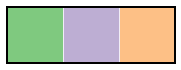

In [146]:
boxplot_cmap=sns.choose_colorbrewer_palette('qualitative')

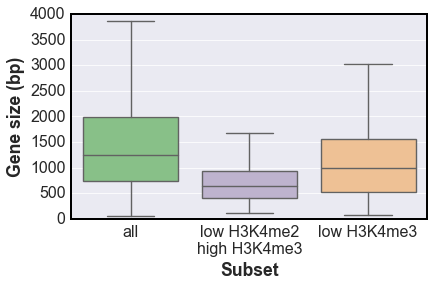

In [154]:
sns.set_context('paper',font_scale=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
ax = sns.boxplot(x="cat", y="sizes", data=size,showfliers=False,palette=boxplot_cmap)
ax.set_xlabel('Subset',weight='bold')
ax.set_ylabel('Gene size (bp)',weight='bold')
plt.tight_layout()
plt.savefig('SuppFig1E.pdf')

In [164]:
jhd2_datasets=[('wt(jhd2)_me3','../Chip4/me3_yf336_treat_pileup.bdg','bed',1),
              ('wt(jhd2)_me2','../Chip4/me2_yf336_treat_pileup.bdg','bed',1),
              ('jhd2_me3','../Chip4/me3_jhd2_treat_pileup.bdg','bed',1.349821666),
              ('jhd2_me2','../Chip4/me2_jhd2_treat_pileup.bdg','bed',1.288142648)]

In [165]:
'''hdf5_file_jhd2=h5py.File("Supp_Figure1.hdf5","w")

for item in jhd2_datasets:
    print(item)
    create_hdf5_track(item[0],hdf5_file_jhd2)
    load_track_in_hdf5(item[1],item[0],hdf5_file_jhd2,item[2],item[3])

hdf5_file_jhd2.close()'''
hdf5_file_jhd2=h5py.File("Supp_Figure1.hdf5","r")



In [166]:
wt_jhd2_me3_heat=create_anchor_plot(hdf5_file_jhd2,'wt(jhd2)_me3',-1500,1500,gene_list)
wt_jhd2_me2_heat=create_anchor_plot(hdf5_file_jhd2,'wt(jhd2)_me2',-1500,1500,gene_list)
jhd2_me3_heat=create_anchor_plot(hdf5_file_jhd2,'jhd2_me3',-1500,1500,gene_list)
jhd2_me2_heat=create_anchor_plot(hdf5_file_jhd2,'jhd2_me2',-1500,1500,gene_list)


YAR075W
YCL076W
YFR057W
YAR075W
YCL076W
YFR057W
YAR075W
YCL076W
YFR057W
YAR075W
YCL076W
YFR057W


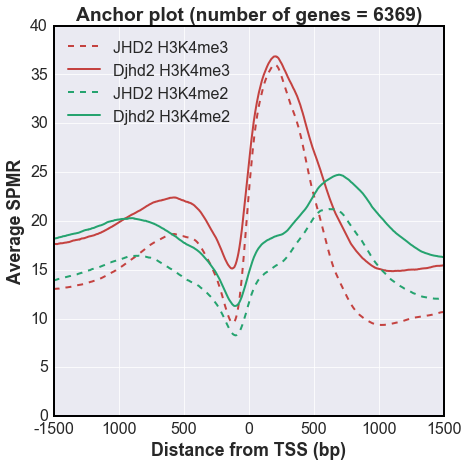

In [167]:

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
plt.figure(figsize=(7,7))
plt.plot(np.mean(wt_jhd2_me3_heat[0],axis=0),"--",label='JHD2 H3K4me3',color=sns.xkcd_rgb['reddish'],lw=2)
plt.plot(np.mean(jhd2_me3_heat[0],axis=0),label='Djhd2 H3K4me3',color=sns.xkcd_rgb['reddish'],lw=2)
plt.plot(np.mean(wt_jhd2_me2_heat[0],axis=0),"--",label='JHD2 H3K4me2',color=sns.xkcd_rgb['teal green'],lw=2)
plt.plot(np.mean(jhd2_me2_heat[0],axis=0),label='Djhd2 H3K4me2',color=sns.xkcd_rgb['teal green'],lw=2)
plt.legend(loc='best')
ax=plt.gca()
ax.set_ylim(0,40)
ax.set_title('Anchor plot (number of genes = 6369)',weight='bold')
ax.set_ylabel("Average SPMR",weight='bold')
ax.set_xticklabels([-1500,1000,500,0,500,1000,1500])

ax.set_xlabel('Distance from TSS (bp)',weight='bold');
#plt.savefig('SuppFig1A.pdf',type='pdf')

In [168]:
a=create_array(hdf5_file_jhd2,'wt(jhd2)_me3',np.argmax,gene_list)
b=create_array(hdf5_file_jhd2,'wt(jhd2)_me2',np.argmax,gene_list)
c=create_array(hdf5_file_jhd2,'jhd2_me3',np.argmax,gene_list)
d=create_array(hdf5_file_jhd2,'jhd2_me2',np.argmax,gene_list)

A=create_array(hdf5_file_jhd2,'wt(jhd2)_me3',np.max,gene_list)
B=create_array(hdf5_file_jhd2,'wt(jhd2)_me2',np.max,gene_list)
C=create_array(hdf5_file_jhd2,'jhd2_me3',np.max,gene_list)
D=create_array(hdf5_file_jhd2,'jhd2_me2',np.max,gene_list)

print('*'*20)
print('Position')
print('H3K4me3 wt')
print("mean:{}; median:{}; 90 percentil:{}; stddev:{}".format(np.mean(a),
                                        np.median(a),np.percentile(a,90),np.std(a)))
print('H3K4me2 wt')
print("mean:{}; median:{}; 90 percentil:{}; stddev:{}".format(np.mean(b),
                                        np.median(b),np.percentile(b,90),np.std(b)))

print('H3K4me3 jhd2')
print("mean:{}; median:{}; 90 percentil:{}; stddev:{}".format(np.mean(c),
                                        np.median(c),np.percentile(c,90),np.std(c)))
print('H3K4me2 jhd2')
print("mean:{}; median:{}; 90 percentil:{}; stddev:{}".format(np.mean(d),
                                        np.median(d),np.percentile(d,90),np.std(d)))



print('*'*20)
print('Max')
print('H3K4me3 wt')
print("mean:{}; median:{}; 95 percentil:{}".format(np.mean(A),
                                        np.median(A),np.percentile(A,95)))
print('H3K4me2 wt')
print("mean:{}; median:{}; 95 percentil:{}".format(np.mean(B),
                                        np.median(B),np.percentile(B,95)))

print('H3K4me3 jhd2')
print("mean:{}; median:{}; 95 percentil:{}".format(np.mean(C),
                                        np.median(C),np.percentile(C,95)))
print('H3K4me2 jhd2')
print("mean:{}; median:{}; 95 percentil:{}".format(np.mean(D),
                                        np.median(D),np.percentile(D,95)))

********************
Position
H3K4me3 wt
mean:266.72677338355305; median:199.0; 90 percentil:434.0; stddev:325.4865987157922
H3K4me2 wt
mean:541.1978970495919; median:547.0; 90 percentil:871.0; stddev:362.11227407411315
H3K4me3 jhd2
mean:272.31544256120526; median:207.0; 90 percentil:450.0; stddev:323.51538935590423
H3K4me2 jhd2
mean:584.6500313873195; median:591.0; 90 percentil:967.0; stddev:383.9644165681503
********************
Max
H3K4me3 wt
mean:43.27256774902344; median:47.66579818725586; 95 percentil:68.80789184570312
H3K4me2 wt
mean:29.670001983642578; median:31.34564971923828; 95 percentil:42.09272003173828
H3K4me3 jhd2
mean:44.86716842651367; median:47.97968292236328; 95 percentil:65.30567932128906
H3K4me2 jhd2
mean:34.15400695800781; median:35.538169860839844; 95 percentil:47.87781524658203


In [261]:
df_wt_jhd2_me3_all=pd.DataFrame({"name":[item.name for item in gene_list],
                       'max':create_array(hdf5_file_jhd2,'wt(jhd2)_me3',np.max,gene_list),
                       'max_90_percentile':create_max_array(hdf5_file_jhd2,'wt(jhd2)_me3',gene_list,434),
                       'argmax_90_percentile':create_argmax_array(hdf5_file_jhd2,'wt(jhd2)_me3',gene_list,434)})

df_wt_jhd2_me2_all=pd.DataFrame({"name":[item.name for item in gene_list],
                       'max':create_array(hdf5_file_jhd2,'wt(jhd2)_me2',np.max,gene_list),
                       'max_90_percentile':create_max_array(hdf5_file_jhd2,'wt(jhd2)_me2',gene_list,871),
                       'argmax_90_percentile':create_argmax_array(hdf5_file_jhd2,'wt(jhd2)_me2',gene_list,871)})

df_jhd2_me3_all=pd.DataFrame({"name":[item.name for item in gene_list],
                       'max':create_array(hdf5_file_jhd2,'jhd2_me3',np.max,gene_list),
                       'max_90_percentile':create_max_array(hdf5_file_jhd2,'jhd2_me3',gene_list,450),
                       'argmax_90_percentile':create_argmax_array(hdf5_file_jhd2,'jhd2_me3',gene_list,450)})

df_jhd2_me2_all=pd.DataFrame({"name":[item.name for item in gene_list],
                       'max':create_array(hdf5_file_jhd2,'jhd2_me2',np.max,gene_list),
                       'max_90_percentile':create_max_array(hdf5_file_jhd2,'jhd2_me2',gene_list,967),
                       'argmax_90_percentile':create_argmax_array(hdf5_file_jhd2,'jhd2_me2',gene_list,967)})

In [262]:
df_order=pd.DataFrame({"name":[item.name for item in wt_jhd2_me3_heat[-1]],
                        'max_90_percentile':create_max_array(hdf5_file_jhd2,'wt(jhd2)_me3',wt_jhd2_me3_heat[-1],434)})
order=np.argsort(df_order['max_90_percentile'].tolist())[::-1]

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


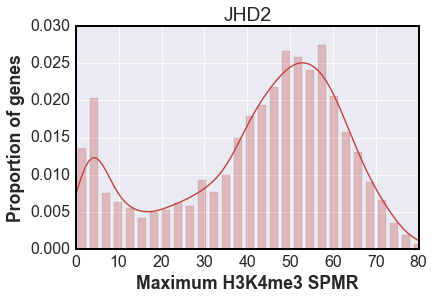

In [105]:
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
sns.distplot(df_wt_jhd2_me3_all['max_90_percentile'],color=sns.xkcd_rgb['reddish'],hist_kws={'alpha':0.3,'rwidth':0.7})
ax=plt.gca()
ax.set_xlim(0,80)
ax.set_xlabel('Maximum H3K4me3 SPMR',weight='bold')
ax.set_ylabel("Proportion of genes",weight='bold')
plt.tight_layout()
plt.title('JHD2')
plt.savefig('SuppFig1B_1.pdf',type='pdf')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


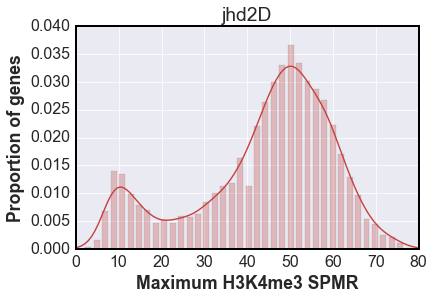

In [106]:
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.edgecolor']='black'
sns.distplot(df_jhd2_me3_all['max_90_percentile'],color=sns.xkcd_rgb['reddish'],hist_kws={'alpha':0.3,'rwidth':0.7})
ax=plt.gca()
ax.set_xlim(0,80)
ax.set_xlabel('Maximum H3K4me3 SPMR',weight='bold')
ax.set_ylabel("Proportion of genes",weight='bold')
plt.tight_layout()
plt.title('jhd2D')
plt.savefig('SuppFig1B_2.pdf',type='pdf')

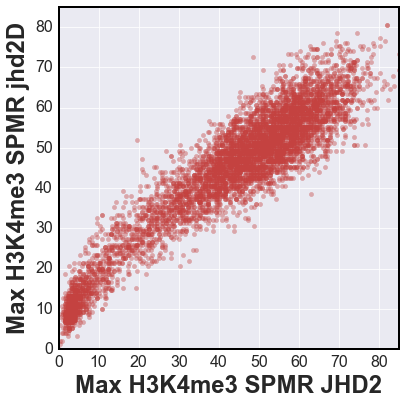

In [172]:
plt.figure(figsize=(6,6))
plt.scatter(df_wt_jhd2_me3_all['max_90_percentile'],df_jhd2_me3_all['max_90_percentile'],alpha=0.4,color=sns.xkcd_rgb['reddish'])
plt.axis('equal')
plt.xlim(0,85)
plt.ylim(0,85)
plt.xlabel('Max H3K4me3 SPMR JHD2',weight='bold',size=24)
plt.ylabel('Max H3K4me3 SPMR jhd2D',weight='bold',size=24)
plt.tight_layout()
#plt.savefig('SuppFig1C.pdf',type='pdf')

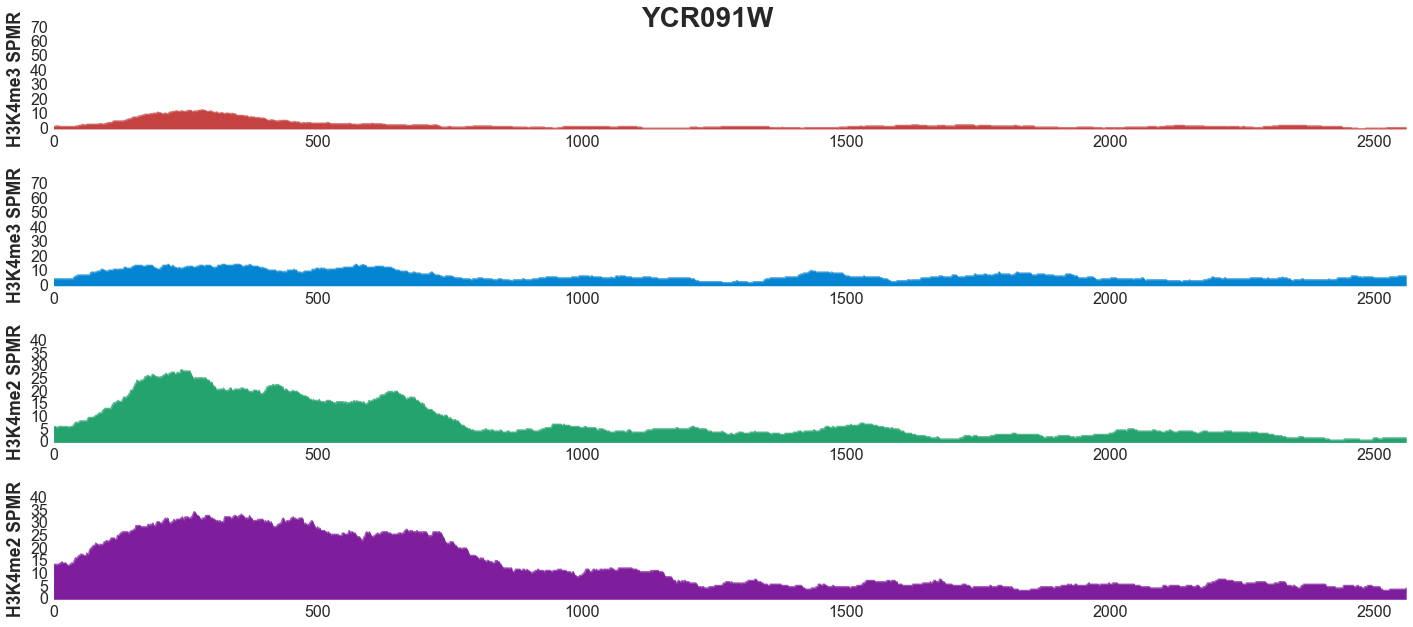

In [109]:
#chrIII:274404..276566

mpl.rcParams['axes.linewidth'] = 0
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,9))
ax1.plot(hdf5_file_jhd2['wt(jhd2)_me3']['III'][274404-200:276566+200],color=sns.xkcd_rgb['reddish'],alpha=0.7)
ax1.set_xlim(0,len(hdf5_file_jhd2['wt(jhd2)_me3']['III'][274404-200:276566+200]))
ax1.fill_between(y1=hdf5_file_jhd2['wt(jhd2)_me3']['III'][274404-200:276566+200],
                                 x=np.arange(0,len(hdf5_file_jhd2['wt(jhd2)_me3']['III'][274404-200:276566+200])),color=sns.xkcd_rgb['reddish'],
                 alpha=1)
ax1.set_axis_bgcolor('white')

ax2.plot(hdf5_file_jhd2['jhd2_me3']['III'][274404-200:276566+200],color=sns.xkcd_rgb['cerulean'],alpha=0.7)
ax2.set_xlim(0,len(hdf5_file_jhd2['jhd2_me3']['III'][274404-200:276566+200]))
ax2.fill_between(y1=hdf5_file_jhd2['jhd2_me3']['III'][274404-200:276566+200],
                                 x=np.arange(0,len(hdf5_file_jhd2['jhd2_me3']['III'][274404-200:276566+200])),
                 color=sns.xkcd_rgb['cerulean'],
                 alpha=1)
ax2.set_axis_bgcolor('white')

ax3.plot(hdf5_file_jhd2['wt(jhd2)_me2']['III'][274404-200:276566+200],color=sns.xkcd_rgb['teal green'],alpha=0.7)
ax3.set_xlim(0,len(hdf5_file_jhd2['wt(jhd2)_me2']['III'][274404-200:276566+200]))
ax3.fill_between(y1=hdf5_file_jhd2['wt(jhd2)_me2']['III'][274404-200:276566+200],
                                 x=np.arange(0,len(hdf5_file_jhd2['wt(jhd2)_me2']['III'][274404-200:276566+200])),
                 color=sns.xkcd_rgb['teal green'],
                 alpha=1)
ax3.set_axis_bgcolor('white')

ax4.plot(hdf5_file_jhd2['jhd2_me2']['III'][274404-200:276566+200],color=sns.xkcd_rgb['purple'],alpha=0.7)
ax4.set_xlim(0,len(hdf5_file_jhd2['jhd2_me2']['III'][274404-200:276566+200]))
ax4.fill_between(y1=hdf5_file_jhd2['jhd2_me2']['III'][274404-200:276566+200],
                                 x=np.arange(0,len(hdf5_file_jhd2['jhd2_me2']['III'][274404-200:276566+200])),
                 color=sns.xkcd_rgb['purple'],
                 alpha=1)
ax4.set_axis_bgcolor('white')

ax1.set_ylim(0,70)
ax2.set_ylim(0,70)
ax3.set_ylim(0,40)
ax4.set_ylim(0,40)
fig.suptitle('YCR091W',weight='bold',size=28)
ax1.set_ylabel('H3K4me3 SPMR',weight='bold')
ax2.set_ylabel('H3K4me3 SPMR',weight='bold')
ax3.set_ylabel('H3K4me2 SPMR',weight='bold')
ax4.set_ylabel('H3K4me2 SPMR',weight='bold')

plt.tight_layout()
plt.savefig('SuppFig1D.pdf',type='pdf')

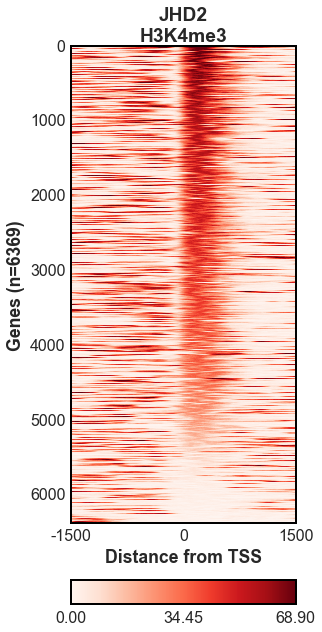

In [270]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(wt_jhd2_me3_heat[0][order],interpolation='none'
                    ,cmap='Reds',vmin=0,vmax=68.9)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('JHD2\nH3K4me3',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[0,68.9/2,68.9])
    plt.savefig('SuppFigI_11.pdf',type='pdf')

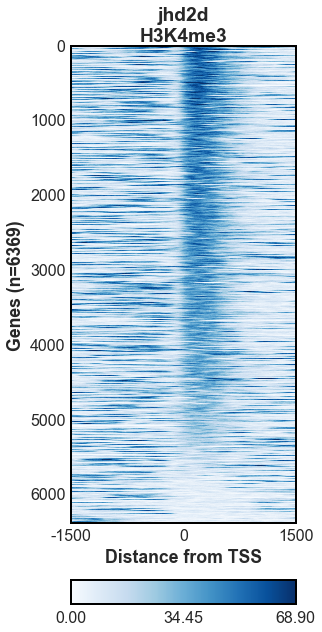

In [271]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(jhd2_me3_heat[0][order],interpolation='none'
                    ,cmap='Blues',vmin=0,vmax=68.9)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('jhd2d\nH3K4me3',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[0,68.9/2,68.9])
    plt.savefig('SuppFigI_12.pdf',type='pdf')

me3 max:12.867466926574707
me3 min:-6.812829971313477


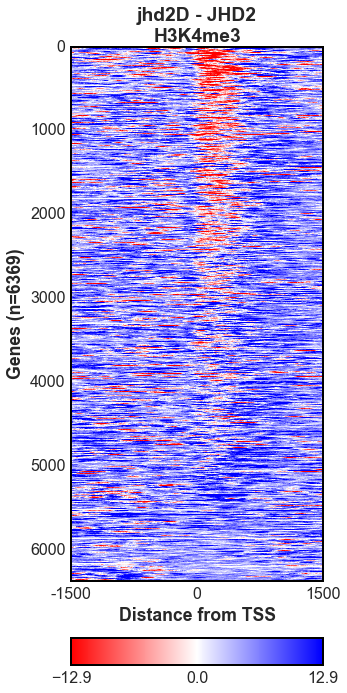

In [276]:

dif_me3=jhd2_me3_heat[0]-wt_jhd2_me3_heat[0]
print('me3 max:{}'.format(np.percentile(dif_me3,95)))
print('me3 min:{}'.format(np.percentile(dif_me3,5)))

from mpl_toolkits.axes_grid1 import make_axes_locatable
with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(dif_me3[order],interpolation='none'
                    ,cmap='bwr_r',vmin=-12.9,vmax=12.9)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('jhd2D - JHD2\nH3K4me3',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[-12.9,0,12.9])
    plt.tight_layout()
    plt.savefig('SuppFigI_13.pdf',type='pdf')

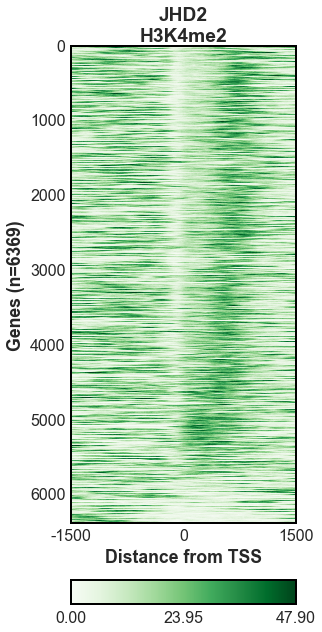

In [273]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(wt_jhd2_me2_heat[0][order],interpolation='none'
                    ,cmap='Greens',vmin=0,vmax=47.9)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('JHD2\nH3K4me2',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[0,47.9/2,47.9])
    plt.savefig('SuppFigI_21.pdf',type='pdf')

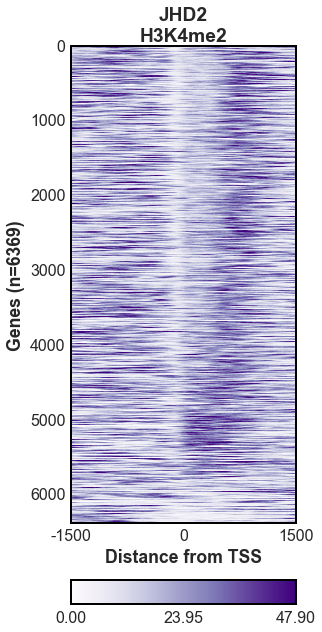

In [274]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(jhd2_me2_heat[0][order],interpolation='none'
                    ,cmap='Purples',vmin=0,vmax=47.9)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('jhd2D\nH3K4me2',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[0,47.9/2,47.9])
    plt.savefig('SuppFigI_22.pdf',type='pdf')

me2 max:12.176706314086914
me2 min:-3.709625244140625


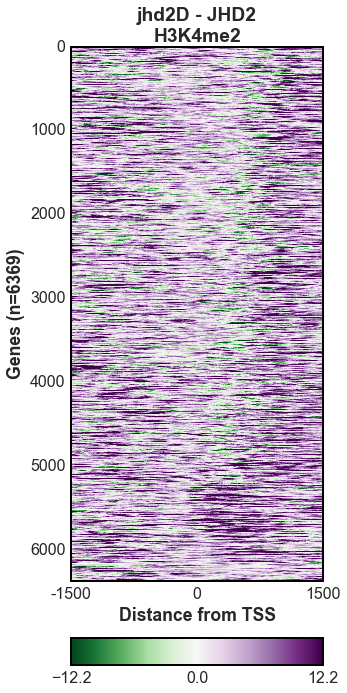

In [275]:
dif_me2=jhd2_me2_heat[0]-wt_jhd2_me2_heat[0]
print('me2 max:{}'.format(np.percentile(dif_me2,95)))
print('me2 min:{}'.format(np.percentile(dif_me2,5)))

from mpl_toolkits.axes_grid1 import make_axes_locatable
with sns.axes_style("dark"):
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['axes.edgecolor']='black'
    fig,ax1=plt.subplots(1,figsize=(5,10))
    ax1_=ax1.imshow(dif_me2[order],interpolation='none'
                    ,cmap='PRGn_r',vmin=-12.2,vmax=12.2)
    labels = ['','-1500','','','0','','','1500','']
    ax1.set_xticklabels(labels)
    ax1.set_xlabel('Distance from TSS',weight='bold')
    ax1.set_ylabel('Genes (n={})'.format(len(order)),weight='bold')
    ax1.set_title('jhd2D - JHD2\nH3K4me2',weight='bold')
    temp_ax1=ax1.get_xaxis()
    temp_ax1.tick_bottom()
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.8)
    cbar1 = plt.colorbar(ax1_, cax=cax1,orientation='horizontal',
                         ticks=[-12.2,0,12.2])
    plt.tight_layout()
    plt.savefig('SuppFigI_23.pdf',type='pdf')

In [189]:
TR_df=pd.read_csv("../../PelechanoTR.txt",sep='\t')

In [190]:
TR_me3_merged=pd.merge(left=TR_df,right=df_wt_me3_all,left_on="Sistematic name",right_on='name')

In [206]:
TR_me2_merged=pd.merge(left=TR_df,right=df_wt_me2_all,left_on="Sistematic name",right_on='name')

In [199]:
from scipy.stats import pearsonr as pearson

max value: SpearmanrResult(correlation=0.40328125667436054, pvalue=9.0664307198647563e-197)
max position:SpearmanrResult(correlation=0.084328859158871616, pvalue=1.964547728931249e-09)
max value: SpearmanrResult(correlation=-0.31128528548456047, pvalue=4.282638709526994e-101)
max position:SpearmanrResult(correlation=-0.02428863365557693, pvalue=0.10432858450137233)
max value: SpearmanrResult(correlation=0.43310210106414671, pvalue=3.4057173463387663e-169)
max position:SpearmanrResult(correlation=0.083406307439207641, pvalue=3.7228738428957928e-07)
max value: SpearmanrResult(correlation=0.40392435383657271, pvalue=1.1421366700212758e-178)
max position:SpearmanrResult(correlation=0.072348528310326926, pvalue=9.9707669044742937e-07)
max value: SpearmanrResult(correlation=0.42706024316182178, pvalue=4.6010469912091856e-164)
max position:SpearmanrResult(correlation=0.083837529658717963, pvalue=3.2390519136364217e-07)
max value: SpearmanrResult(correlation=0.40391687384416602, pvalue=1.16112

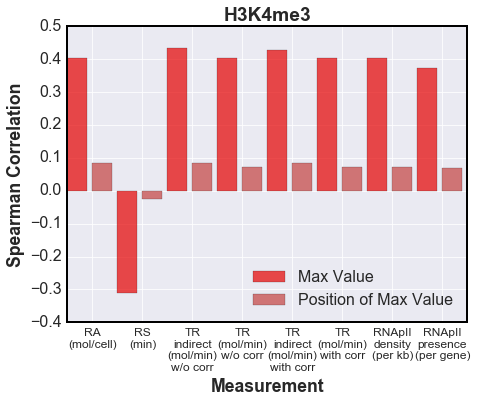

In [259]:
measures=['RA (mol/cell) [Nagalakshmi et al. 2008; Miura et al. 2008]',
       'RS (min) [Wang et al. 2002]',
       'TR indirect (mol/min) w/o dilution correction',
       'TR (mol/min) w/o dilution correction',
       'TR indirect (mol/min) dilution corrected',
       'TR (mol/min) dilution corrected', 'RNA pol II density (per kb)',
       'RNA pol II  presence (per gene)']
max_corr=[]
argmax_corr=[]
for item in measures:
    temp_df=TR_me3_merged[[item,'max_90_percentile']].dropna()
    print('max value: '+str(spearman(temp_df[item],temp_df['max_90_percentile'])))
    max_corr.append(spearman(temp_df[item],temp_df['max_90_percentile']).correlation)
    temp_df=TR_me3_merged[[item,'argmax_90_percentile']].dropna()
    print('max position:'+str(spearman(temp_df[item],temp_df['argmax_90_percentile'])))
    argmax_corr.append(spearman(temp_df[item],temp_df['argmax_90_percentile']).correlation)

plt.figure(figsize=(7,6))
plt.bar(np.arange(len(max_corr)),max_corr,width=0.4,color=sns.xkcd_rgb['red'],alpha=0.7,label='Max Value')
plt.bar(np.arange(len(max_corr))+0.5,argmax_corr,width=0.4,color=sns.xkcd_rgb['reddish'],
        alpha=0.7,label='Position of Max Value')
plt.legend(loc='best')
plt.ylabel('Spearman Correlation',weight='bold')
plt.xlabel('Measurement',weight='bold')
plt.title('H3K4me3',weight='bold')
plt.xticks(np.arange(0.5,8.5),['RA\n(mol/cell)',
                               'RS\n(min)',
                               'TR\nindirect\n(mol/min)\nw/o corr',
                              'TR\n(mol/min)\nw/o corr',
                              'TR\nindirect\n(mol/min)\nwith corr',
                              'TR\n(mol/min)\nwith corr',
                              'RNApII\ndensity\n(per kb)',
                              'RNApII\npresence\n(per gene)'],fontsize=12)
plt.tight_layout()
plt.savefig('SuppFig1H_1.pdf',type='pdf')

max value: SpearmanrResult(correlation=0.15545336229529097, pvalue=1.125205272703175e-28)
max position:SpearmanrResult(correlation=0.19965343702072091, pvalue=1.5014695467148489e-46)
max value: SpearmanrResult(correlation=-0.10466966867506036, pvalue=2.2557379280564068e-12)
max position:SpearmanrResult(correlation=-0.21143797746173471, pvalue=2.2173625082876175e-46)
max value: SpearmanrResult(correlation=0.078907575124718618, pvalue=1.5276674546283128e-06)
max position:SpearmanrResult(correlation=0.24050473577129056, pvalue=7.0838371938022119e-50)
max value: SpearmanrResult(correlation=0.06165227436905709, pvalue=3.0804825188686091e-05)
max position:SpearmanrResult(correlation=0.18455414304245318, pvalue=3.035184795416244e-36)
max value: SpearmanrResult(correlation=0.082977294637762336, pvalue=4.273026257209025e-07)
max position:SpearmanrResult(correlation=0.23578896507699701, pvalue=5.9214582524924626e-48)
max value: SpearmanrResult(correlation=0.061612902517556134, pvalue=3.116705264

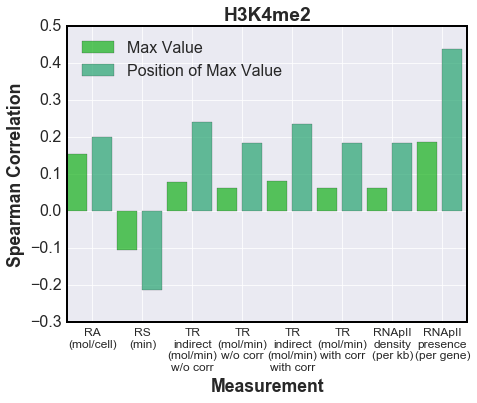

In [260]:
measures=['RA (mol/cell) [Nagalakshmi et al. 2008; Miura et al. 2008]',
       'RS (min) [Wang et al. 2002]',
       'TR indirect (mol/min) w/o dilution correction',
       'TR (mol/min) w/o dilution correction',
       'TR indirect (mol/min) dilution corrected',
       'TR (mol/min) dilution corrected', 'RNA pol II density (per kb)',
       'RNA pol II  presence (per gene)']
max_corr=[]
argmax_corr=[]
for item in measures:
    temp_df=TR_me2_merged[[item,'max_90_percentile']].dropna()
    print('max value: '+str(spearman(temp_df[item],temp_df['max_90_percentile'])))
    max_corr.append(spearman(temp_df[item],temp_df['max_90_percentile']).correlation)
    temp_df=TR_me2_merged[[item,'argmax_90_percentile']].dropna()
    print('max position:'+str(spearman(temp_df[item],temp_df['argmax_90_percentile'])))
    argmax_corr.append(spearman(temp_df[item],temp_df['argmax_90_percentile']).correlation)

plt.figure(figsize=(7,6))
plt.bar(np.arange(len(max_corr)),max_corr,width=0.4,color=sns.xkcd_rgb['green'],alpha=0.7,label='Max Value')
plt.bar(np.arange(len(max_corr))+0.5,argmax_corr,width=0.4,color=sns.xkcd_rgb['teal green'],
        alpha=0.7,label='Position of Max Value')
plt.ylabel('Spearman Correlation',weight='bold')
plt.xlabel('Measurement',weight='bold')
plt.title('H3K4me2',weight='bold')
plt.xticks(np.arange(0.5,8.5),['RA\n(mol/cell)',
                               'RS\n(min)',
                               'TR\nindirect\n(mol/min)\nw/o corr',
                              'TR\n(mol/min)\nw/o corr',
                              'TR\nindirect\n(mol/min)\nwith corr',
                              'TR\n(mol/min)\nwith corr',
                              'RNApII\ndensity\n(per kb)',
                              'RNApII\npresence\n(per gene)'],fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('SuppFig1H_2.pdf',type='pdf')


In [218]:
a=spearman(temp_df[item],temp_df['max_90_percentile'])

In [219]:
a.correlation

0.40328125667436054